In [1]:
% matplotlib inline

from __future__ import division
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import time as tm
import gsw as sw
from scipy.optimize import curve_fit
from scipy.stats import chi2

import numpy.ma as ma

from mpl_toolkits.basemap import Basemap, cm
from netCDF4 import Dataset as NetCDFFile

from matplotlib import rcParams, rc
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})
#rc('text', usetex=True)

/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#def make_section(beg_cast, end_cast, var):
    # make gridded section with distance and deoth as the


In [3]:
# set data directory 
indir = r'/Users/sclayton/Google Drive/2014 IrnBru/'

ctdFile = r'%sShips data MV1405/CTD/DATA & PLOTS/binned_downcast.xls' % indir
ctd = pd.read_excel(ctdFile, header = 0, sheet = 0)

casts = pd.unique(ctd.cast)
print ctd.columns

Index([u'cast', u'latitude', u'longitude', u'depSM', u'prDM', u't090C',
       u't190C', u'sal00', u'sal11', u'c0uS/cm', u'c1uS/cm', u'CStarAt0',
       u'CStarTr0', u'sigma-é00', u'sigma-é11', u'flSP', u'sbeox0Mm/Kg',
       u'sbeox0PS', u'potemp090C', u'potemp190C', u'potemp90Cdiff', u'par'],
      dtype='object')


/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


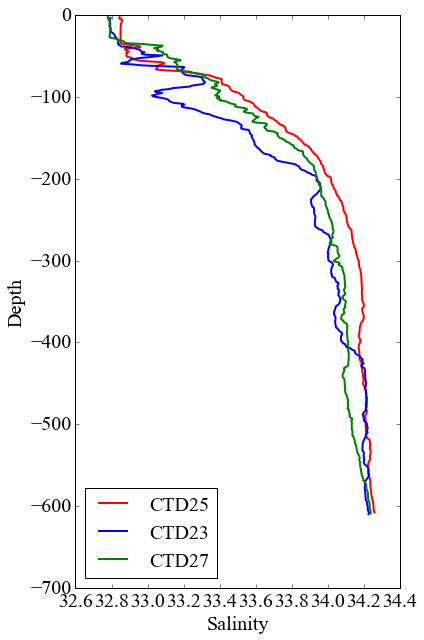

In [4]:
profAC = ctd[ctd['cast']=='CTD025']
profOUT = ctd[ctd['cast']=='CTD023']
profOUTT = ctd[ctd['cast']=='CTD027']

fig1 = plt.figure(figsize=(6, 9), dpi = 600)
plt.plot(profAC.sal11, -profAC.depSM, 'r', lw = 2, label = 'CTD25')
plt.plot(profOUT.sal11, -profOUT.depSM, 'b', lw = 2, label = 'CTD23')
plt.plot(profOUTT.sal11, -profOUTT.depSM, 'g', lw =2, label = 'CTD27')

plt.xlabel("Salinity", fontsize = 20)
plt.ylabel("Depth", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=20, loc = 'lower left')
plt.show()

fig1.savefig('../figures/AC_Sal_profiles.png', dpi = 600)

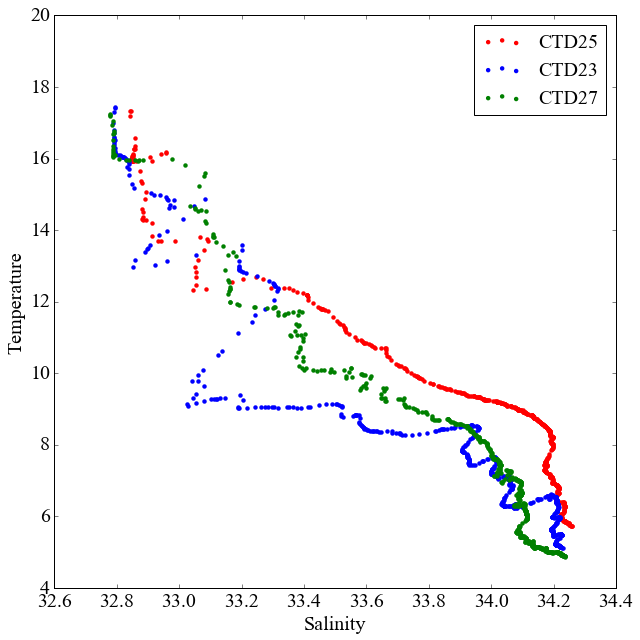

In [14]:
fig2 = plt.figure(figsize=(9, 9), dpi = 600)
plt.scatter(profAC.sal11,profAC.t190C, s=20, label = 'CTD25', c = 'r', lw = 0)
plt.scatter(profOUT.sal11,profOUT.t190C, s = 20, label = 'CTD23', c = 'b', lw = 0)
plt.scatter(profOUTT.sal11,profOUTT.t190C, s = 20, label = 'CTD27', c = 'g', lw = 0)

plt.xlabel("Salinity", fontsize = 20)
plt.ylabel("Temperature", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

fig2.savefig('../figures/AC_TS.png', dpi = 600)

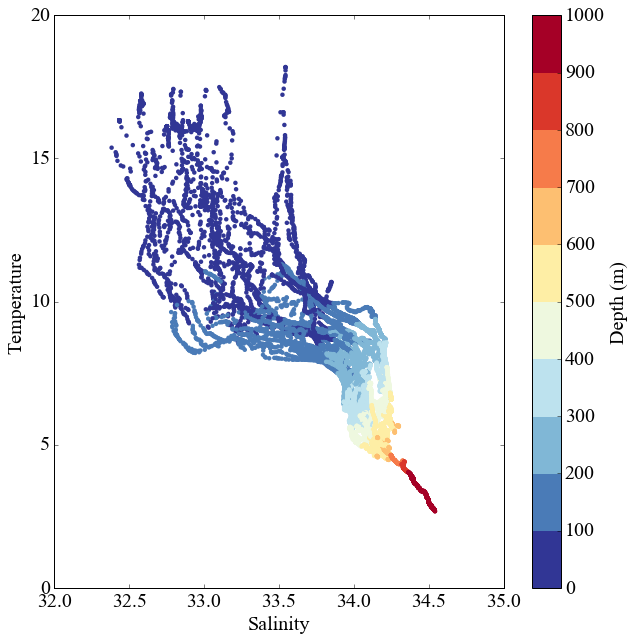

In [35]:
fig3 = plt.figure(figsize=(9, 9), dpi = 600)

palette = plt.get_cmap('RdYlBu_r', 10)
plt.scatter(ctd.sal11,ctd.t190C, s=20, c = ctd.depSM, lw = 0, cmap = palette, vmin = 0, vmax = 1000)
plt.xlabel("Salinity", fontsize = 20)
plt.ylabel("Temperature", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
cb = plt.colorbar()
cb.set_label('Depth (m)',fontsize=20)
cb.ax.tick_params(labelsize=20)
plt.show()

fig3.savefig('../figures/TS_all.png', dpi = 600)

